In [10]:
## Installation
# !pip install pandas
# !pip install jupyterlab-code-formatter
# !pip install black isort
# !pip install matplotlib

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Station Codes
JFK (NY) - USW00094789 

In [12]:
bts_csv_files = []
# for i in range(2010, 2023):
#     for j in range(1, 13):
#         bts_csv_files.append(f"BTS\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_{i}_{j}.csv")
for j in range(1, 9):
    bts_csv_files.append(f"BTS\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2023_{j}.csv")
# bts_csv_files 

a = pd.read_csv(bts_csv_files[0])
# print(a.columns.values.tolist())
bts_csv_cols = ['FlightDate', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'Origin', 'Dest', 'DepDelay', 'ArrDelay', 'WeatherDelay']
df_concat = pd.concat([pd.read_csv(f, usecols=bts_csv_cols) for f in bts_csv_files], ignore_index=True)
df_concat

C:\Users\reddy\AppData\Local\Temp\ipykernel_39656\224472514.py:9: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  a = pd.read_csv(bts_csv_files[0])


,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,Dest,DepDelay,ArrDelay,WeatherDelay
0,2023-01-02,9E,N605LR,4628,BDL,LGA,-3.0,-12.0,NaN
1,2023-01-03,9E,N605LR,4628,BDL,LGA,-5.0,-8.0,NaN
2,2023-01-04,9E,N331PQ,4628,BDL,LGA,-5.0,-21.0,NaN
3,2023-01-05,9E,N906XJ,4628,BDL,LGA,-6.0,-17.0,NaN
4,2023-01-06,9E,N337PQ,4628,BDL,LGA,-1.0,-16.0,NaN
...,...,...,...,...,...,...,...,...,...
4545417,2023-08-01,YX,N732YX,3406,EWR,AVL,-6.0,-29.0,NaN
4545418,2023-08-01,YX,N733YX,3405,EWR,SDF,-7.0,-29.0,NaN
4545419,2023-08-01,YX,N752YX,3404,EWR,DTW,5.0,50.0,0.0
4545420,2023-08-01,YX,N651RW,3403,CHS,IAD,-8.0,-7.0,NaN


In [13]:
jfk_df = pd.read_csv('USW00094789.csv', 
                     names=["STATION-ID", "DATE", "ELEMENT", "ELEMENT-VALUE", "M-FLAG", "Q-FLAG", "S-FLAG", "OBS-TIME"],
                     dtype={"Q-FLAG": str}, index_col=False)
# jfk_df.reset_index(drop=True)
jfk_df

,STATION-ID,DATE,ELEMENT,ELEMENT-VALUE,M-FLAG,Q-FLAG,S-FLAG,OBS-TIME
0,USW00094789,19480717,TMAX,233,NaN,NaN,X,NaN
1,USW00094789,19480718,TMAX,272,NaN,NaN,X,NaN
2,USW00094789,19480719,TMAX,294,NaN,NaN,X,NaN
3,USW00094789,19480720,TMAX,289,NaN,NaN,X,NaN
4,USW00094789,19480721,TMAX,294,NaN,NaN,X,NaN
...,...,...,...,...,...,...,...,...
351585,USW00094789,20231104,WSF5,81,NaN,NaN,W,NaN
351586,USW00094789,20231105,WSF5,98,NaN,NaN,W,NaN
351587,USW00094789,20231106,WSF5,103,NaN,NaN,W,NaN
351588,USW00094789,20231107,WSF5,148,NaN,NaN,W,NaN


In [14]:
# Date Filtering
jfk_from_2010_df = jfk_df[(jfk_df["DATE"] > 20220000) & (jfk_df["DATE"] < 20230000)]
jfk_from_2010_df

,STATION-ID,DATE,ELEMENT,ELEMENT-VALUE,M-FLAG,Q-FLAG,S-FLAG,OBS-TIME
339498,USW00094789,20220101,TMAX,117,NaN,NaN,W,2400.0
339499,USW00094789,20220102,TMAX,150,NaN,NaN,W,2400.0
339500,USW00094789,20220103,TMAX,39,NaN,NaN,W,2400.0
339501,USW00094789,20220104,TMAX,6,NaN,NaN,W,2400.0
339502,USW00094789,20220105,TMAX,78,NaN,NaN,W,2400.0
...,...,...,...,...,...,...,...,...
346254,USW00094789,20221207,WT02,1,NaN,NaN,W,NaN
346255,USW00094789,20221231,WT02,1,NaN,NaN,W,NaN
346256,USW00094789,20221211,WT04,1,NaN,NaN,W,NaN
346257,USW00094789,20221206,WT08,1,NaN,NaN,W,NaN


In [15]:
# AWND = Average daily wind speed (tenths of meters per second)
# FMTM = Time of fastest mile or fastest 1-minute wind 
# PGTM = Peak gust time (hours and minutes, i.e., HHMM)
# WDF2 = Direction of fastest 2-minute wind (degrees)
# WDF5 = Direction of fastest 5-second wind (degrees)
# WSF2 = Fastest 2-minute wind speed (tenths of meters per second)
# WSF5 = Fastest 5-second wind speed (tenths of meters per second)
# WT11 = High or damaging winds
display_cols = ["STATION-ID", "DATE", "ELEMENT", "ELEMENT-VALUE"]
jfk_from_2010_df_dir = jfk_from_2010_df[display_cols].query("ELEMENT in ['WDF2']")
jfk_from_2010_df_mag = jfk_from_2010_df[display_cols].query("ELEMENT in ['WSF2']")

In [16]:
jfk_from_2010_df_dir.DATE = pd.to_datetime(jfk_from_2010_df_dir['DATE'], format='%Y%m%d')

<Axes: xlabel='DATE'>

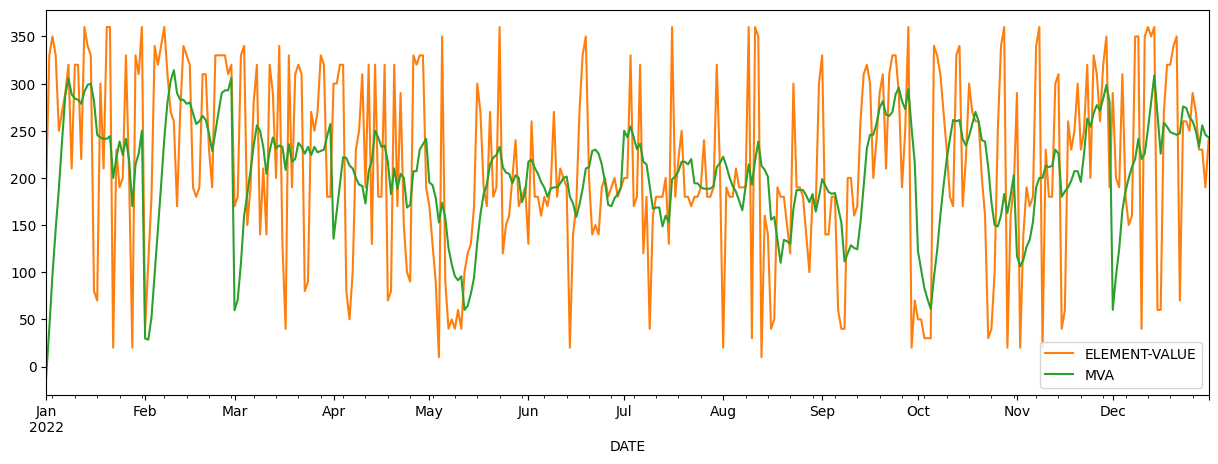

In [17]:
jfk_from_2010_df_dir["ELEMENT-VALUE"].hist()
ax = plt.gca() 
jfk_from_2010_df_dir.plot(x="DATE", y="ELEMENT-VALUE", figsize=(15,5), ax=ax)
jfk_from_2010_df_dir['MVA'] = jfk_from_2010_df['ELEMENT-VALUE'].rolling(7).mean()
jfk_from_2010_df_dir.plot(x="DATE", y="MVA", figsize=(15,5), ax=ax)

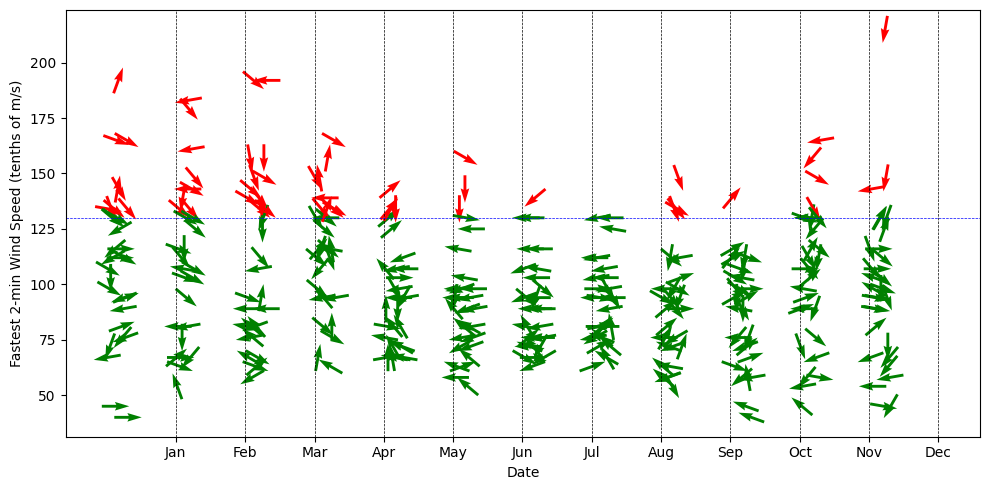

In [18]:
# aa = df_concat[(df_concat['Dest'] == 'JFK') & (df_concat['Dest'] == 'JFK')]
# aa.plot(x="FlightDate", y="WeatherDelay", figsize=(15,5))
# print(np.cos(jfk_from_2010_df_dir['ELEMENT-VALUE']).shape, jfk_from_2010_df_mag['ELEMENT-VALUE'].shape)
# U = np.cos(jfk_from_2010_df_dir['ELEMENT-VALUE']).to_numpy() * jfk_from_2010_df_mag['ELEMENT-VALUE'].to_numpy()
# V = np.sin(jfk_from_2010_df_dir['ELEMENT-VALUE']).to_numpy() * jfk_from_2010_df_mag['ELEMENT-VALUE'].to_numpy()
U = np.cos(jfk_from_2010_df_dir['ELEMENT-VALUE'] * np.pi / 180).to_numpy() 
V = np.sin(jfk_from_2010_df_dir['ELEMENT-VALUE'] * np.pi / 180).to_numpy() 
# print(np.sin(jfk_from_2010_df_dir['ELEMENT-VALUE']))
# print(jfk_from_2010_df_mag['ELEMENT-VALUE'])
# print(V.shape)
# print(U.shape, V.shape, (jfk_from_2010_df_mag['ELEMENT-VALUE'] * np.pi / 180).shape)
plt.figure(figsize=(10,5))
plt.quiver(jfk_from_2010_df_mag['DATE'], jfk_from_2010_df_mag['ELEMENT-VALUE'], U, V, scale= 1/0.03, pivot='mid', color=np.where(jfk_from_2010_df_mag['ELEMENT-VALUE'] > 130, 'red', 'green'), linewidths=.1)
m = 1
while m <= 12:
    plt.axvline(x=20220100 +  m * 100, linewidth=0.5, linestyle ="--", color='black')
    m += 1
plt.axhline(y=130, linewidth=0.5, linestyle ="--", color='blue')
plt.xlabel('Date')
plt.ylabel('Fastest 2-min Wind Speed (tenths of m/s)')
plt.xticks(range(20220200, 20221400, 100), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
# plt.title("Plot representing the wind direction and speed over a 12 month period")
plt.show()

In [19]:
# jfk_from_2010_df.to_csv('file1.csv')

In [20]:
# !pip install windrose

In [21]:
import plotly.graph_objects as go

fig = go.Figure(go.Barpolar(
    r=[3.5, 1.5, 2.5, 4.5, 4.5, 4, 3],
    theta=[65, 15, 210, 110, 312.5, 180, 270],
    width=[20,15,10,20,15,30,15,],
    marker_color=["#E4FF87", '#709BFF', '#709BFF', '#FFAA70', '#FFAA70', '#FFDF70', '#B6FFB4'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8
))

fig.update_layout(
    template=None,
    polar = dict(
        radialaxis = dict(range=[0, 5], showticklabels=False, ticks=''),
        angularaxis = dict(showticklabels=False, ticks='')
    )
)

import plotly.io as pio
pio.renderers.default = 'iframe'
fig.show()

In [22]:
jfk_from_2010_df_dir

,STATION-ID,DATE,ELEMENT,ELEMENT-VALUE,MVA
339932,USW00094789,2022-01-01,WDF2,190,-11.142857
339933,USW00094789,2022-01-02,WDF2,330,39.857143
339934,USW00094789,2022-01-03,WDF2,350,97.428571
339935,USW00094789,2022-01-04,WDF2,330,145.571429
339936,USW00094789,2022-01-05,WDF2,250,188.571429
...,...,...,...,...,...
346144,USW00094789,2022-12-27,WDF2,270,250.000000
346145,USW00094789,2022-12-28,WDF2,230,232.857143
346146,USW00094789,2022-12-29,WDF2,230,255.714286
346147,USW00094789,2022-12-30,WDF2,190,245.714286


In [24]:
# import pandas as pd
# from windrose import WindroseAxes
# import numpy as np

# # load the downloaded data and dropna
# # df = pd.read_csv('weatherAUS/weatherAUS.csv').dropna(subset=['WindGustDir'])

# # create a dict for WindGustDir to numeric values
# wind_dir = ['E', 'ENE', 'NE', 'NNE', 'N', 'NNE', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']
# degrees = np.arange(0, 360, 22.5)
# wind_dir_deg = dict((zip(wind_dir, degrees)))

# # plot and map WindGustDir to the dict
# ax = WindroseAxes.from_ax()
# ax.bar(direction=df.WindGustDir.map(wind_dir_deg), var=df.Rainfall, normed=True, opening=0.8, edgecolor='white')
# ax.set_legend()

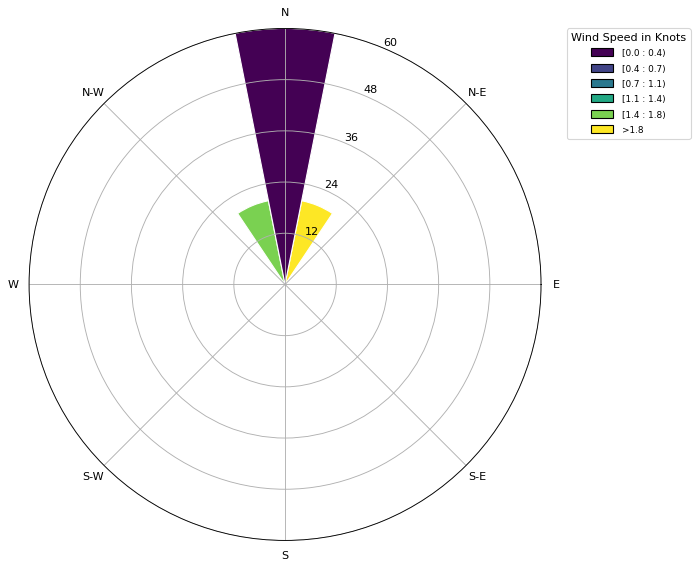

In [25]:
from matplotlib.projections import register_projection

register_projection(WindroseAxes)

ws = [1.81,1.58,0.09,0.11,0.01]
wd = [20,340,0,0,0]
ws_array = np.array(ws)
wd_array = np.array(wd)

ax = WindroseAxes.from_ax()
ax.bar(wd_array, ws_array, normed=True, opening=1.0, edgecolor='white')

color_s = ['red', 'blue', 'lime', 'yellow', 'violet', 'aqua', 'pink', 'grey', 'darkred', 'navy', 'green']
ax.set_legend(title = 'Wind Speed in Knots', bbox_to_anchor=(1.05, 1), loc='upper left', handles = color_s, borderaxespad=0.)

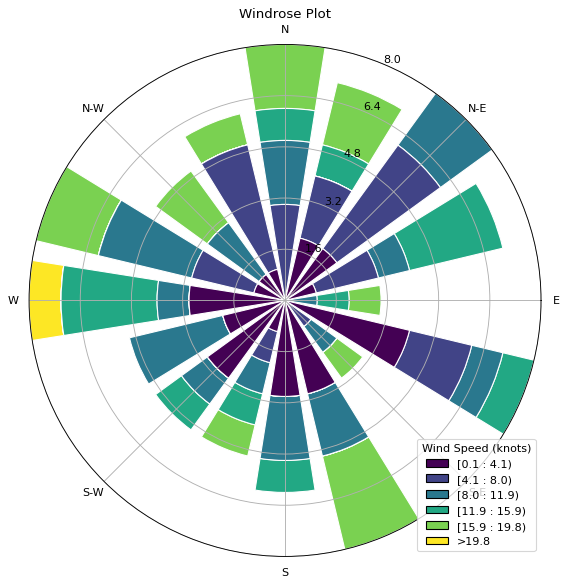

In [26]:
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import numpy as np

# Sample wind direction and speed data (replace this with your data)
wind_direction = np.random.random(100) * 360  # Values between 0 and 360 degrees
wind_speed = np.random.random(100) * 20  # Arbitrary wind speed values

# Create a WindroseAxes object
ax = WindroseAxes.from_ax()
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.legend(title='Wind Speed (knots)', loc='lower right')

# Set title and display the plot
ax.set_title('Windrose Plot')
plt.show()

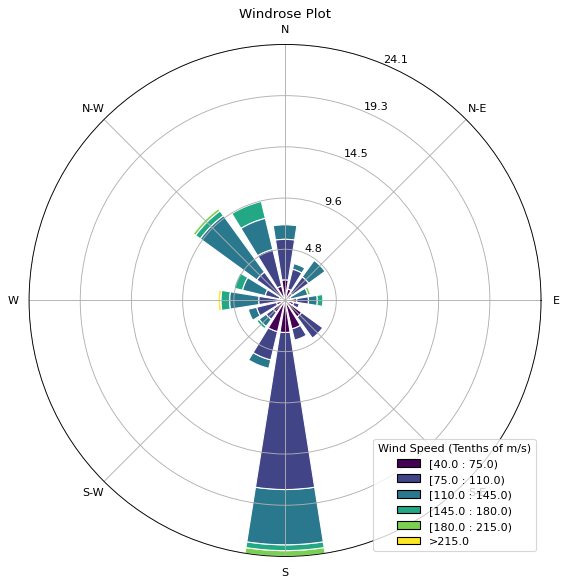

In [27]:

import matplotlib.pyplot as plt
from windrose import WindroseAxes
import numpy as np

# Sample wind direction and speed data (replace this with your data)
wind_direction = jfk_from_2010_df_dir['ELEMENT-VALUE'].to_numpy()
wind_speed = jfk_from_2010_df_mag['ELEMENT-VALUE'].to_numpy()

# Create a WindroseAxes object
ax = WindroseAxes.from_ax()
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.legend(title='Wind Speed (Tenths of m/s)', loc='lower right')

# Set title and display the plot
ax.set_title('Windrose Plot')
plt.show()

In [28]:
df_concat.dropna(subset=['WeatherDelay'])

,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,Dest,DepDelay,ArrDelay,WeatherDelay
11,2023-01-11,9E,N135EV,4629,LGA,BGM,35.0,61.0,0.0
12,2023-01-12,9E,N197PQ,4629,LGA,BGM,132.0,132.0,0.0
13,2023-01-13,9E,N915XJ,4629,LGA,BGM,-5.0,34.0,0.0
16,2023-01-17,9E,N902XJ,4629,LGA,BGM,15.0,40.0,0.0
18,2023-01-19,9E,N691CA,4629,LGA,BGM,676.0,673.0,667.0
...,...,...,...,...,...,...,...,...,...
4545400,2023-08-01,YX,N721YX,3426,IAD,CMH,-3.0,16.0,0.0
4545402,2023-08-01,YX,N751YX,3424,EWR,MHT,-8.0,17.0,0.0
4545408,2023-08-01,YX,N758YX,3417,BGR,EWR,0.0,15.0,0.0
4545414,2023-08-01,YX,N730YX,3410,BGR,EWR,-4.0,48.0,0.0


In [29]:
bts_csv_files = []
# for i in range(2010, 2023):
#     for j in range(1, 13):
#         bts_csv_files.append(f"BTS\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_{i}_{j}.csv")
for j in range(1, 13):
    bts_csv_files.append(f"BTS\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2022_{j}.csv")
# bts_csv_files 

a = pd.read_csv(bts_csv_files[0])
# print(a.columns.values.tolist())
bts_csv_cols = ['FlightDate', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'Origin', 'Dest', 'DepDelay', 'ArrDelay', 'WeatherDelay']
df_concat_2022 = pd.concat([pd.read_csv(f, usecols=bts_csv_cols) for f in bts_csv_files], ignore_index=True)
df_concat_2022

C:\Users\reddy\AppData\Local\Temp\ipykernel_39656\2499679163.py:9: DtypeWarning:

Columns (76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.



,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,Dest,DepDelay,ArrDelay,WeatherDelay
0,2022-01-14,YX,N119HQ,4879,CMH,DCA,-3.0,4.0,NaN
1,2022-01-15,YX,N122HQ,4879,CMH,DCA,-10.0,-24.0,NaN
2,2022-01-16,YX,N412YX,4879,CMH,DCA,-6.0,-13.0,NaN
3,2022-01-17,YX,N405YX,4879,CMH,DCA,-7.0,9.0,NaN
4,2022-01-18,YX,N420YX,4879,CMH,DCA,-6.0,-29.0,NaN
...,...,...,...,...,...,...,...,...,...
6729120,2022-12-21,NK,N623NK,913,MCI,LAX,-5.0,-14.0,NaN
6729121,2022-12-22,NK,N623NK,913,MCI,LAX,-3.0,-6.0,NaN
6729122,2022-12-23,NK,N692NK,913,MCI,LAX,6.0,-22.0,NaN
6729123,2022-12-24,NK,N622NK,913,MCI,LAX,-3.0,-34.0,NaN


In [30]:
df_concat_2022.dropna(subset=['WeatherDelay']).groupby('FlightDate').mean('WeatherDelay')
result = df_concat_2022.dropna(subset=['WeatherDelay']).groupby('FlightDate')['WeatherDelay'].mean()

df_concat_2022_gb = result.to_frame()
# Selecting specific columns from the resulting DataFrame
df_concat_2022_gb

,WeatherDelay
FlightDate,
2022-01-01,4.547207
2022-01-02,2.536205
2022-01-03,2.874474
2022-01-04,2.208980
2022-01-05,4.367148
...,...
2022-12-27,1.778196
2022-12-28,2.389159
2022-12-29,2.316157


In [31]:
# jfk_from_2010_df_dir.merge(df_concat_2022_gb, left_index=True, right_index=True)

# result['FlightDate'] = pd.to_datetime(result['FlightDate'])
# merged_data = jfk_from_2010_df_dir.merge(result, how='inner', left_on='DATE', right_on='FlightDate')


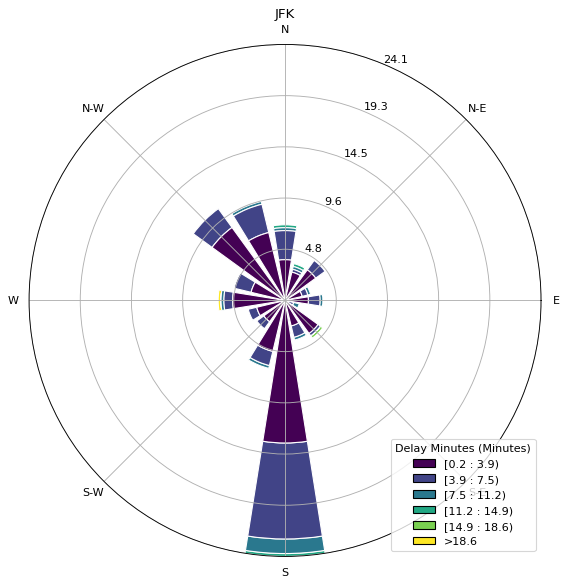

In [32]:

import matplotlib.pyplot as plt
from windrose import WindroseAxes
import numpy as np

# Sample wind direction and speed data (replace this with your data)
wind_direction = jfk_from_2010_df_dir['ELEMENT-VALUE'].to_numpy()
wind_speed = df_concat_2022_gb['WeatherDelay'].to_numpy()

# Create a WindroseAxes object
ax = WindroseAxes.from_ax()
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.legend(title='Delay Minutes (Minutes)', loc='lower right')

# Set title and display the plot
ax.set_title('JFK')
plt.show()

In [33]:
# df_concat_2022.dropna(subset=['WeatherDelay']).groupby('FlightDate').mean('WeatherDelay')
# result = df_concat_2022.dropna(subset=['WeatherDelay']).groupby('FlightDate')['WeatherDelay'].mean()

# df_concat_2022_gb = result.to_frame()
# df_concat_2022
df_concat_2022_JFK = df_concat_2022.loc[(df_concat_2022['Origin'] == 'JFK') | (df_concat_2022['Dest'] == 'JFK')]
# df_concat_2022_JFK.dropna(subset=['WeatherDelay']).groupby('FlightDate').mean('WeatherDelay')
result = df_concat_2022_JFK.dropna(subset=['WeatherDelay']).groupby('FlightDate')['WeatherDelay'].mean()

df_concat_2022_JFK_gb = result.to_frame()
df_concat_2022_JFK_gb

,WeatherDelay
FlightDate,
2022-01-01,6.494186
2022-01-02,0.661224
2022-01-03,1.832618
2022-01-04,0.397590
2022-01-05,0.098684
...,...
2022-12-27,0.356000
2022-12-28,1.035000
2022-12-29,0.725146


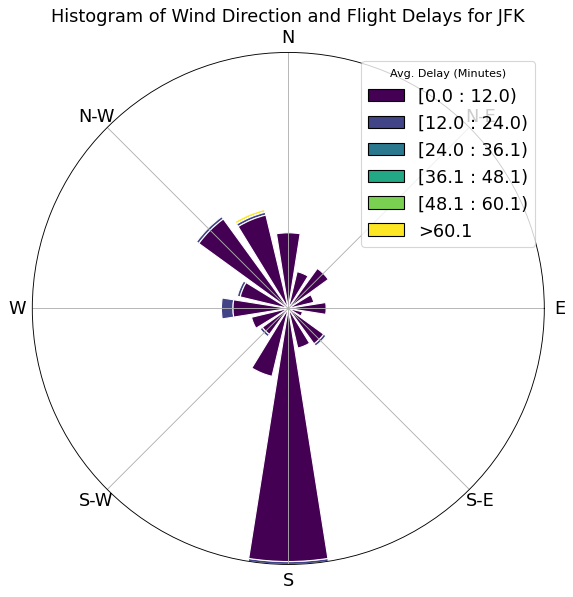

In [72]:

import matplotlib.pyplot as plt
from windrose import WindroseAxes
import numpy as np

# Sample wind direction and speed data (replace this with your data)
wind_direction = jfk_from_2010_df_dir['ELEMENT-VALUE'].to_numpy()
wind_speed = df_concat_2022_JFK_gb['WeatherDelay'].to_numpy()

# Create a WindroseAxes object
ax = WindroseAxes.from_ax()
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_yticks([])

ax.legend(title='Avg. Delay (Minutes)', loc='upper right', fontsize=16)

# Increase font size for ticks
ax.tick_params(labelsize=16)

# Set title and display the plot
ax.set_title('Histogram of Wind Direction and Flight Delays for JFK', fontsize=16)
# histogram plot displays the relationship between wind direction and flight delays for JFK Airport.
plt.show()

In [73]:
df_concat_2022_LAX = df_concat_2022.loc[(df_concat_2022['Origin'] == 'LAX') | (df_concat_2022['Dest'] == 'LAX')]
# df_concat_2022_LAX.dropna(subset=['WeatherDelay']).groupby('FlightDate').mean('WeatherDelay')
result = df_concat_2022_LAX.dropna(subset=['WeatherDelay']).groupby('FlightDate')['WeatherDelay'].mean()

df_concat_2022_LAX_gb = result.to_frame()
df_concat_2022_LAX_gb

,WeatherDelay
FlightDate,
2022-01-01,2.686792
2022-01-02,2.032020
2022-01-03,4.841076
2022-01-04,2.716667
2022-01-05,0.737705
...,...
2022-12-27,7.035821
2022-12-28,1.350877
2022-12-29,1.430894


In [74]:
lax_df = pd.read_csv('USW00023174.csv', header=0)
lax_df

C:\Users\reddy\AppData\Local\Temp\ipykernel_39656\1688556122.py:1: DtypeWarning:

Columns (17,19,21,23,25,27,29,31,33,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,79,81,83,85,89,91,93,95,101,103,105,107,109) have mixed types. Specify dtype option on import or set low_memory=False.



,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT18,WT18_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WV01,WV01_ATTRIBUTES,WV03,WV03_ATTRIBUTES,WV20,WV20_ATTRIBUTES
0,USW00023174,1944-01-01,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00023174,1944-01-02,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00023174,1944-01-03,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00023174,1944-01-04,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00023174,1944-01-05,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,USW00023174,2023-11-28,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.0,",,W,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29187,USW00023174,2023-11-29,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.0,",,W,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29188,USW00023174,2023-11-30,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.0,",,W,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29189,USW00023174,2023-12-01,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.0,",,D,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Date Filtering
lax_from_2010_df = lax_df[(lax_df["DATE"] > "2022-00-00") & (lax_df["DATE"] < "2023-00-00")]
lax_from_2010_df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT18,WT18_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WV01,WV01_ATTRIBUTES,WV03,WV03_ATTRIBUTES,WV20,WV20_ATTRIBUTES
28490,USW00023174,2022-01-01,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.0,",,W,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28491,USW00023174,2022-01-02,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.0,",,W,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28492,USW00023174,2022-01-03,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.0,",,W,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28493,USW00023174,2022-01-04,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.0,",,W,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28494,USW00023174,2022-01-05,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.0,",,W,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28850,USW00023174,2022-12-27,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",124.0,",,W,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28851,USW00023174,2022-12-28,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",3.0,",,W,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28852,USW00023174,2022-12-29,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",0.0,"T,,W,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28853,USW00023174,2022-12-30,33.93816,-118.3866,29.7,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",13.0,",,W,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
display_cols_lax = ["STATION", "DATE", "WDF2", "WSF2"]
# lax_from_2010_df_dir = lax_from_2010_df[display_cols_lax].query("ELEMENT in ['WDF2']")
# lax_from_2010_df_mag = lax_from_2010_df[display_cols_lax].query("ELEMENT in ['WSF2']")
lax_from_2010_df_dir = lax_from_2010_df[display_cols_lax]
lax_from_2010_df_mag = lax_from_2010_df[display_cols_lax]
lax_from_2010_df[display_cols_lax]

,STATION,DATE,WDF2,WSF2
28490,USW00023174,2022-01-01,260.0,54.0
28491,USW00023174,2022-01-02,270.0,67.0
28492,USW00023174,2022-01-03,260.0,67.0
28493,USW00023174,2022-01-04,240.0,45.0
28494,USW00023174,2022-01-05,270.0,54.0
...,...,...,...,...
28850,USW00023174,2022-12-27,240.0,54.0
28851,USW00023174,2022-12-28,240.0,54.0
28852,USW00023174,2022-12-29,110.0,45.0
28853,USW00023174,2022-12-30,260.0,45.0


In [77]:
# lax_from_2010_df_dir.DATE = pd.to_datetime(lax_from_2010_df_dir['DATE'], format='%Y-%m-%d')
df_concat_2022_LAX = df_concat_2022.loc[(df_concat_2022['Origin'] == 'LAX') | (df_concat_2022['Dest'] == 'LAX')]
# df_concat_2022_JFK.dropna(subset=['WeatherDelay']).groupby('FlightDate').mean('WeatherDelay')
result_lax = df_concat_2022_LAX.dropna(subset=['WeatherDelay']).groupby('FlightDate')['WeatherDelay'].mean()

df_concat_2022_LAX_gb = result_lax.to_frame()
df_concat_2022_LAX_gb

,WeatherDelay
FlightDate,
2022-01-01,2.686792
2022-01-02,2.032020
2022-01-03,4.841076
2022-01-04,2.716667
2022-01-05,0.737705
...,...
2022-12-27,7.035821
2022-12-28,1.350877
2022-12-29,1.430894


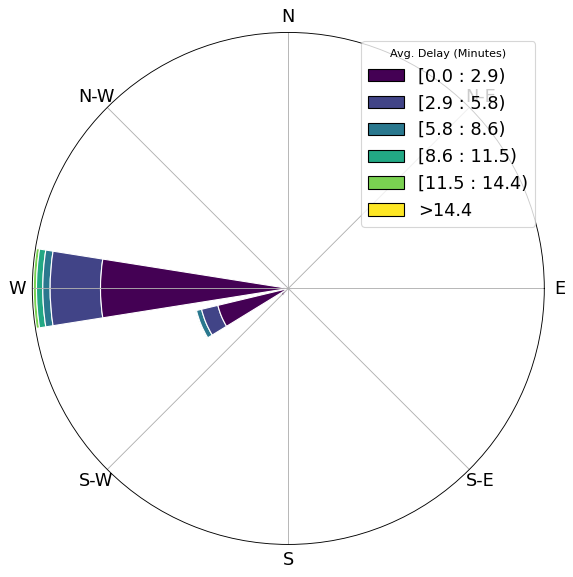

In [84]:

# Sample wind direction and speed data (replace this with your data)
wind_direction_lax = lax_from_2010_df_dir['WDF2'].to_numpy()
wind_speed_lax = df_concat_2022_LAX_gb['WeatherDelay'].to_numpy()

# Create a WindroseAxes object
ax = WindroseAxes.from_ax()
ax.bar(wind_direction_lax, wind_speed_lax, normed=True, opening=0.8, edgecolor='white')

ax.set_yticks([])

ax.legend(title='Avg. Delay (Minutes)', loc='upper right', fontsize=16)

ax.tick_params(labelsize=16)

# Set title and display the plot
# ax.set_title('Histogram of Wind Direction and Flight Delays for LAX', fontsize=16)
plt.show()

# ATL - USW00013874

In [85]:
# lax_from_2010_df_dir.DATE = pd.to_datetime(lax_from_2010_df_dir['DATE'], format='%Y-%m-%d')
df_concat_2022_ATL = df_concat_2022.loc[(df_concat_2022['Origin'] == 'ATL') | (df_concat_2022['Dest'] == 'ATL')]
# df_concat_2022_JFK.dropna(subset=['WeatherDelay']).groupby('FlightDate').mean('WeatherDelay')
result_atl = df_concat_2022_ATL.dropna(subset=['WeatherDelay']).groupby('FlightDate')['WeatherDelay'].mean()

df_concat_2022_ATL_gb = result_atl.to_frame()
df_concat_2022_ATL_gb

,WeatherDelay
FlightDate,
2022-01-01,4.706070
2022-01-02,3.286776
2022-01-03,3.788043
2022-01-04,5.462343
2022-01-05,4.153846
...,...
2022-12-27,2.708934
2022-12-28,0.773585
2022-12-29,2.649306


In [86]:
atl_df = pd.read_csv('USW00013874.csv', header=0)
atl_df

C:\Users\reddy\AppData\Local\Temp\ipykernel_39656\188463959.py:1: DtypeWarning:

Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,77,87,91,93,95,97,99,101,103,105,107,109,111,113,115) have mixed types. Specify dtype option on import or set low_memory=False.



,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,USW00013874,1930-01-01,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,",,0,null",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013874,1930-01-02,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,267.0,",,0,null",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013874,1930-01-03,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,",,0,null",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013874,1930-01-04,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,",,0,null",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013874,1930-01-05,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,",,0,null",0.0,",,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34298,USW00013874,2023-11-28,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34299,USW00013874,2023-11-29,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34300,USW00013874,2023-11-30,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34301,USW00013874,2023-12-01,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,38.0,",,W,2400",0.0,",,D",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Date Filtering
atl_from_2010_df = atl_df[(atl_df["DATE"] > "2022-00-00") & (atl_df["DATE"] < "2023-00-00")]
atl_from_2010_df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV03,WV03_ATTRIBUTES
33602,USW00013874,2022-01-01,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,15.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33603,USW00013874,2022-01-02,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,338.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33604,USW00013874,2022-01-03,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,46.0,",,W,2400",0.0,"T,,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33605,USW00013874,2022-01-04,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33606,USW00013874,2022-01-05,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33962,USW00013874,2022-12-27,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,3.0,",,W,2400",0.0,"T,,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33963,USW00013874,2022-12-28,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33964,USW00013874,2022-12-29,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33965,USW00013874,2022-12-30,33.62972,-84.44224,308.2,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,8.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
display_cols_atl = ["STATION", "DATE", "WDF2", "WSF2"]
# lax_from_2010_df_dir = lax_from_2010_df[display_cols_lax].query("ELEMENT in ['WDF2']")
# lax_from_2010_df_mag = lax_from_2010_df[display_cols_lax].query("ELEMENT in ['WSF2']")
atl_from_2010_df_dir = atl_from_2010_df[display_cols_atl]
atl_from_2010_df_mag = atl_from_2010_df[display_cols_atl]
atl_from_2010_df[display_cols_lax]

,STATION,DATE,WDF2,WSF2
33602,USW00013874,2022-01-01,210.0,103.0
33603,USW00013874,2022-01-02,310.0,134.0
33604,USW00013874,2022-01-03,290.0,161.0
33605,USW00013874,2022-01-04,130.0,67.0
33606,USW00013874,2022-01-05,260.0,72.0
...,...,...,...,...
33962,USW00013874,2022-12-27,200.0,40.0
33963,USW00013874,2022-12-28,110.0,45.0
33964,USW00013874,2022-12-29,140.0,54.0
33965,USW00013874,2022-12-30,120.0,94.0


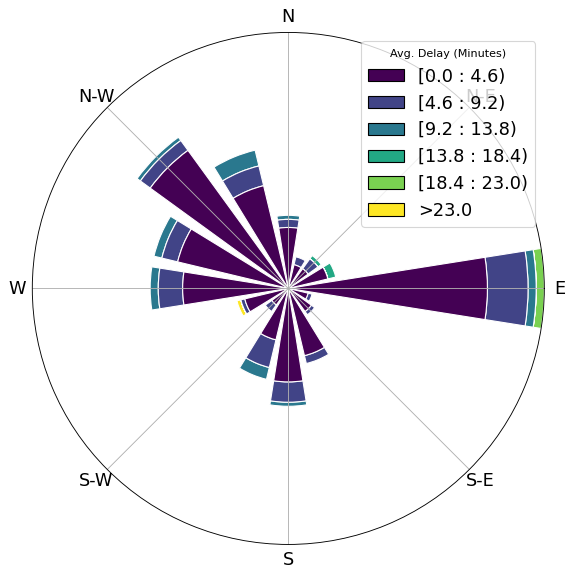

In [90]:

# Sample wind direction and speed data (replace this with your data)
wind_direction_atl = atl_from_2010_df_dir['WDF2'].to_numpy()
wind_speed_atl = df_concat_2022_ATL_gb['WeatherDelay'].to_numpy()

# Create a WindroseAxes object
ax = WindroseAxes.from_ax()
ax.bar(wind_direction_atl, wind_speed_atl, normed=True, opening=0.8, edgecolor='white')
ax.set_yticks([])

ax.legend(title='Avg. Delay (Minutes)', loc='upper right', fontsize=16)

ax.tick_params(labelsize=16)

# Set title and display the plot
# ax.set_title('Histogram of Wind Direction and Flight Delays for ATL', fontsize=16)
plt.show()

# MIA - USW00012839

In [91]:
mia_df = pd.read_csv('USW00012839.csv', header=0)
mia_df

C:\Users\reddy\AppData\Local\Temp\ipykernel_39656\3007169698.py:1: DtypeWarning:

Columns (17,19,21,23,25,27,29,31,37,39,41,43,45,49,51,53,55,57,59,61,63,65,73,75,77,79,83,85,87,89,91,93,95,97) have mixed types. Specify dtype option on import or set low_memory=False.



,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT13,WT13_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT21,WT21_ATTRIBUTES
0,USW00012839,1948-01-01,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,"T,,X,",0.0,",,X",...,NaN,NaN,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN
1,USW00012839,1948-01-02,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",36,",,X,",0.0,",,X",...,NaN,NaN,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN
2,USW00012839,1948-01-03,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,"T,,X,",0.0,",,X",...,NaN,NaN,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN
3,USW00012839,1948-01-04,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,"T,,X,",0.0,",,X",...,NaN,NaN,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN
4,USW00012839,1948-01-05,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,",,X,",0.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27725,USW00012839,2023-11-28,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27726,USW00012839,2023-11-29,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27727,USW00012839,2023-11-30,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27728,USW00012839,2023-12-01,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,",,W,2400",0.0,",,D",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Date Filtering
mia_from_2010_df = mia_df[(mia_df["DATE"] > "2022-00-00") & (mia_df["DATE"] < "2023-00-00")]
mia_from_2010_df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT13,WT13_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT21,WT21_ATTRIBUTES
27029,USW00012839,2022-01-01,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,",,W,2400",0.0,",,H",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27030,USW00012839,2022-01-02,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,",,W,2400",0.0,",,H",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27031,USW00012839,2022-01-03,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,"T,,W,2400",0.0,",,H",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27032,USW00012839,2022-01-04,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,",,W,2400",0.0,",,H",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27033,USW00012839,2022-01-05,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",53,",,W,2400",0.0,",,H",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27389,USW00012839,2022-12-27,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",36,",,W,2400",0.0,",,D",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27390,USW00012839,2022-12-28,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,",,W,2400",0.0,",,D",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27391,USW00012839,2022-12-29,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,",,W,2400",0.0,",,D",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27392,USW00012839,2022-12-30,25.78805,-80.31694,1.4,"MIAMI INTERNATIONAL AIRPORT, FL US",0,",,W,2400",0.0,",,D",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
display_cols_mia = ["STATION", "DATE", "WDF2", "WSF2"]
# lax_from_2010_df_dir = lax_from_2010_df[display_cols_lax].query("ELEMENT in ['WDF2']")
# lax_from_2010_df_mag = lax_from_2010_df[display_cols_lax].query("ELEMENT in ['WSF2']")
mia_from_2010_df_dir = mia_from_2010_df[display_cols_mia]
mia_from_2010_df_mag = mia_from_2010_df[display_cols_mia]
mia_from_2010_df[display_cols_mia]

,STATION,DATE,WDF2,WSF2
27029,USW00012839,2022-01-01,130.0,76.0
27030,USW00012839,2022-01-02,130.0,81.0
27031,USW00012839,2022-01-03,210.0,67.0
27032,USW00012839,2022-01-04,90.0,81.0
27033,USW00012839,2022-01-05,240.0,63.0
...,...,...,...,...
27389,USW00012839,2022-12-27,340.0,45.0
27390,USW00012839,2022-12-28,80.0,76.0
27391,USW00012839,2022-12-29,70.0,81.0
27392,USW00012839,2022-12-30,120.0,63.0


In [94]:
# lax_from_2010_df_dir.DATE = pd.to_datetime(lax_from_2010_df_dir['DATE'], format='%Y-%m-%d')
df_concat_2022_MIA = df_concat_2022.loc[(df_concat_2022['Origin'] == 'MIA') | (df_concat_2022['Dest'] == 'MIA')]
# df_concat_2022_JFK.dropna(subset=['WeatherDelay']).groupby('FlightDate').mean('WeatherDelay')
result_mia = df_concat_2022_MIA.dropna(subset=['WeatherDelay']).groupby('FlightDate')['WeatherDelay'].mean()

df_concat_2022_MIA_gb = result_mia.to_frame()
df_concat_2022_MIA_gb

,WeatherDelay
FlightDate,
2022-01-01,2.876623
2022-01-02,1.715867
2022-01-03,2.842294
2022-01-04,0.158654
2022-01-05,0.081522
...,...
2022-12-27,0.339901
2022-12-28,0.406250
2022-12-29,0.240602


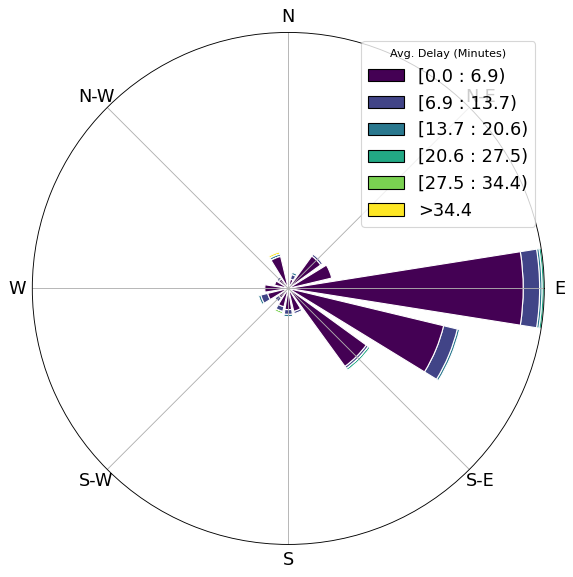

In [96]:

# Sample wind direction and speed data (replace this with your data)
wind_direction_mia = mia_from_2010_df_dir['WDF2'].to_numpy()
wind_speed_mia = df_concat_2022_MIA_gb['WeatherDelay'].to_numpy()

# Create a WindroseAxes object
ax = WindroseAxes.from_ax()
ax.bar(wind_direction_mia, wind_speed_mia, normed=True, opening=0.8, edgecolor='white')

ax.set_yticks([])

ax.legend(title='Avg. Delay (Minutes)', loc='upper right', fontsize=16)

ax.tick_params(labelsize=16)

# Set title and display the plot
# ax.set_title('Histogram of Wind Direction and Flight Delays for ATL', fontsize=16)
plt.show()

# Denver - USW00003017

In [97]:
den_df = pd.read_csv('USW00003017.csv', header=0)
den_df

C:\Users\reddy\AppData\Local\Temp\ipykernel_39656\721071572.py:1: DtypeWarning:

Columns (27,31,41,73,75,77,79,81,83,85,87,89,91,93,95) have mixed types. Specify dtype option on import or set low_memory=False.



,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV01,WV01_ATTRIBUTES,WV03,WV03_ATTRIBUTES
0,USW00003017,1994-07-19,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00003017,1994-07-20,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",20.0,"D,,S,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00003017,1994-07-21,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",0.0,"D,,S,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00003017,1994-07-22,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00003017,1994-07-23,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",0.0,"D,,S,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10517,USW00003017,2023-11-28,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10518,USW00003017,2023-11-29,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10519,USW00003017,2023-11-30,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10520,USW00003017,2023-12-01,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",0.0,",,W,2400",0.0,",,H",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# Date Filtering
den_from_2010_df = den_df[(den_df["DATE"] > "2022-00-00") & (den_df["DATE"] < "2023-00-00")]
den_from_2010_df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV01,WV01_ATTRIBUTES,WV03,WV03_ATTRIBUTES
9821,USW00003017,2022-01-01,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",30.0,",,W,2400",28.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9822,USW00003017,2022-01-02,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9823,USW00003017,2022-01-03,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9824,USW00003017,2022-01-04,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9825,USW00003017,2022-01-05,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",46.0,",,W,2400",79.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10181,USW00003017,2022-12-27,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10182,USW00003017,2022-12-28,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",152.0,",,W,2400",163.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10183,USW00003017,2022-12-29,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",18.0,",,W,2400",18.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10184,USW00003017,2022-12-30,39.84657,-104.65623,1647.2,"DENVER INTERNATIONAL AIRPORT, CO US",0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
display_cols_den = ["STATION", "DATE", "WDF2", "WSF2"]
# lax_from_2010_df_dir = lax_from_2010_df[display_cols_lax].query("ELEMENT in ['WDF2']")
# lax_from_2010_df_mag = lax_from_2010_df[display_cols_lax].query("ELEMENT in ['WSF2']")
den_from_2010_df_dir = den_from_2010_df[display_cols_den]
den_from_2010_df_mag = den_from_2010_df[display_cols_den]
den_from_2010_df[display_cols_den]

,STATION,DATE,WDF2,WSF2
9821,USW00003017,2022-01-01,210.0,81.0
9822,USW00003017,2022-01-02,210.0,89.0
9823,USW00003017,2022-01-03,210.0,81.0
9824,USW00003017,2022-01-04,310.0,134.0
9825,USW00003017,2022-01-05,20.0,107.0
...,...,...,...,...
10181,USW00003017,2022-12-27,210.0,98.0
10182,USW00003017,2022-12-28,70.0,89.0
10183,USW00003017,2022-12-29,10.0,103.0
10184,USW00003017,2022-12-30,170.0,81.0


In [100]:
# lax_from_2010_df_dir.DATE = pd.to_datetime(lax_from_2010_df_dir['DATE'], format='%Y-%m-%d')
df_concat_2022_DEN = df_concat_2022.loc[(df_concat_2022['Origin'] == 'DEN') | (df_concat_2022['Dest'] == 'DEN')]
# df_concat_2022_JFK.dropna(subset=['WeatherDelay']).groupby('FlightDate').mean('WeatherDelay')
result_den = df_concat_2022_DEN.dropna(subset=['WeatherDelay']).groupby('FlightDate')['WeatherDelay'].mean()

df_concat_2022_DEN_gb = result_den.to_frame()
df_concat_2022_DEN_gb

,WeatherDelay
FlightDate,
2022-01-01,1.799582
2022-01-02,1.272727
2022-01-03,1.059701
2022-01-04,0.484906
2022-01-05,2.421348
...,...
2022-12-27,0.673511
2022-12-28,6.705736
2022-12-29,4.784053


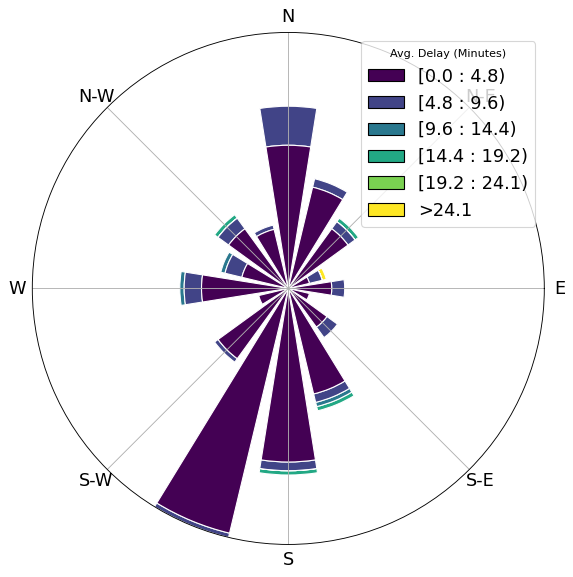

In [102]:

# Sample wind direction and speed data (replace this with your data)
wind_direction_den = den_from_2010_df_dir['WDF2'].to_numpy()
wind_speed_den = df_concat_2022_DEN_gb['WeatherDelay'].to_numpy()

# Create a WindroseAxes object
ax = WindroseAxes.from_ax()
ax.bar(wind_direction_den, wind_speed_den, normed=True, opening=0.8, edgecolor='white')

ax.set_yticks([])

ax.legend(title='Avg. Delay (Minutes)', loc='upper right', fontsize=16)

ax.tick_params(labelsize=16)

# Set title and display the plot
# ax.set_title('Histogram of Wind Direction and Flight Delays for ATL', fontsize=16)
plt.show()

In [113]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + ' Arrivals: ' + df['cnt'].astype(str)
df = df[df['iata'].isin(['JFK', 'ATL', 'MIA', 'DEN', 'DFW', 'ORD', 'SFO', 'MCO', 'SEA', 'LAX'])]

fig = go.Figure(data=go.Scattergeo(
    lon=df['long'],
    lat=df['lat'],
    text=df['text'],
    mode='markers',
    marker=dict(
        size=10,  # Adjust the size as needed
        color=df['cnt'],  # Use 'cnt' column for color
        colorscale='Viridis',  # Adjust colorscale if needed
        colorbar=dict(title='Arrivals')  # Add colorbar
    )
))

fig.update_layout(
    title='Most trafficked US airports (Hover for airport names)',
    geo_scope='usa',
)

fig.show()


In [112]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + ' Arrivals: ' + df['cnt'].astype(str)
df = df[df['iata'].isin(['JFK', 'ATL', 'MIA', 'DEN', 'DFW', 'ORD', 'SFO', 'MCO', 'SEA', 'LAX'])]

fig = go.Figure(data=go.Scattergeo(
    lon=df['long'],
    lat=df['lat'],
    text=df['text'],
    mode='markers',
    marker_color=df['cnt'],
))

# Add a text annotation
fig.add_annotation(
    x=-100,  # Adjust x and y coordinates as needed
    y=40,    # to position the text annotation
    text="Hello World",
    showarrow=False,
    font=dict(
        size=50,
        color="black"
    )
)

fig.update_layout(
    title='Most trafficked US airports (Hover for airport names)',
    geo_scope='usa',
)

fig.show()
